In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Data Understanding and Exploration

● Load and inspect the dataset.

● Handle missing values and check data types.

● Identify correlations and data distributions.

In [58]:
df = pd.read_csv('CarPricePrediction (1).csv')

In [59]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [60]:
df.shape

(4340, 8)

In [61]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [62]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [63]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [64]:
corr=df.corr(numeric_only=True)
corr

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


2. Exploratory Data Analysis (EDA)

● Visualize how features affect the car price.

● Plot heatmaps, histograms, and boxplots to gain insights.

Text(0.5, 1.0, 'owner distribution')

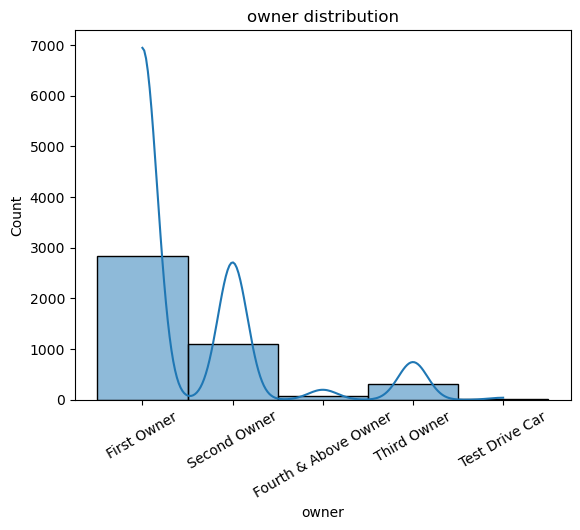

In [65]:
sns.histplot(df['owner'],kde=True)
plt.xticks(rotation=30)
plt.title('owner distribution')

Text(0.5, 1.0, 'type of seller')

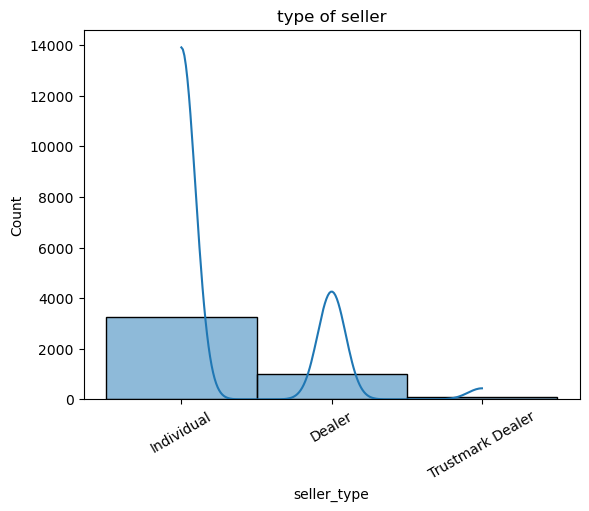

In [66]:
sns.histplot(df['seller_type'],kde=True)
plt.xticks(rotation=30)
plt.title('type of seller')

Text(0.5, 1.0, 'selling price by owner')

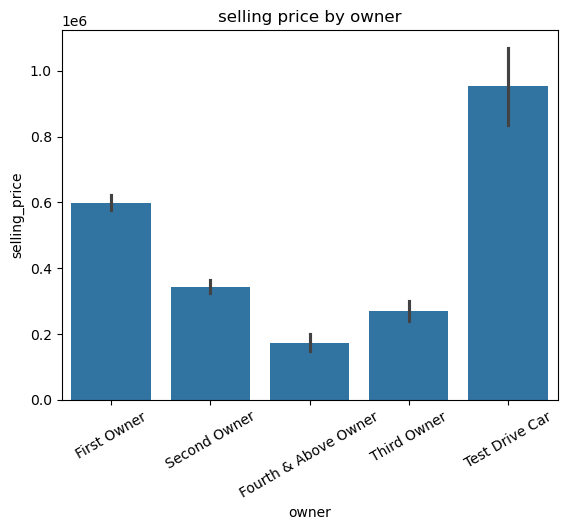

In [67]:
sns.barplot(data=df,x=df['owner'],y=df['selling_price'])
plt.xticks(rotation=30)
plt.title('selling price by owner')

Text(0.5, 1.0, 'selling price by transmission')

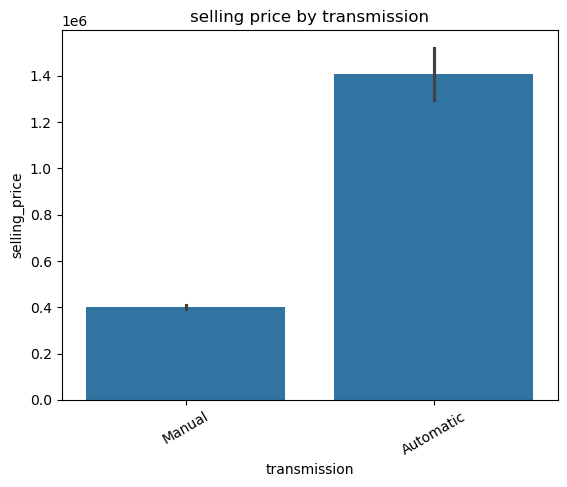

In [68]:
sns.barplot(data=df,x=df['transmission'],y=df['selling_price'])
plt.xticks(rotation=30)
plt.title('selling price by transmission')

Text(0.5, 1.0, 'selling price by fuel')

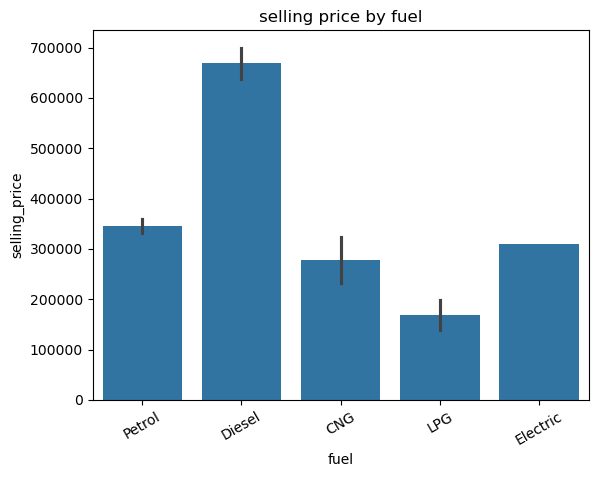

In [69]:
sns.barplot(data=df,x=df['fuel'],y=df['selling_price'])
plt.xticks(rotation=30)
plt.title('selling price by fuel')

<Axes: ylabel='year'>

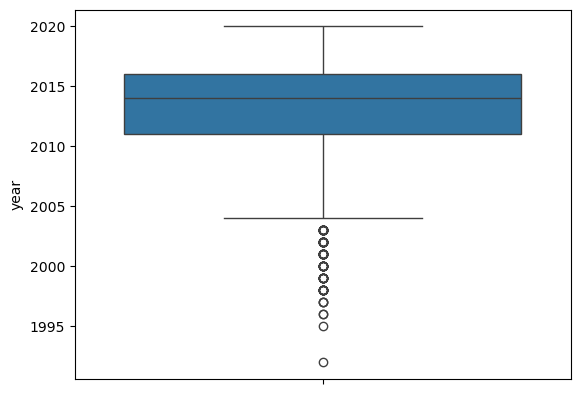

In [70]:
sns.boxplot(df['year'])

<Axes: ylabel='km_driven'>

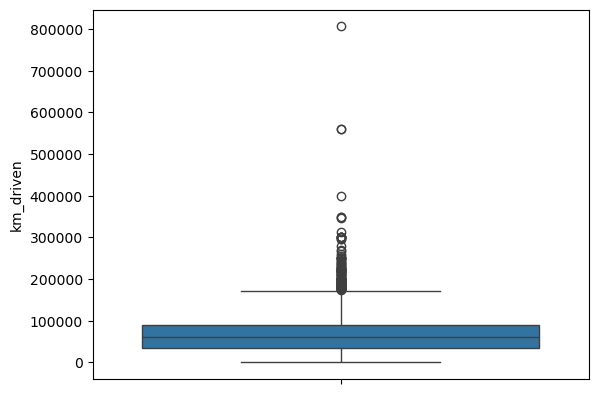

In [71]:
sns.boxplot(df['km_driven'])

Text(0.5, 1.0, 'correlation heatmap')

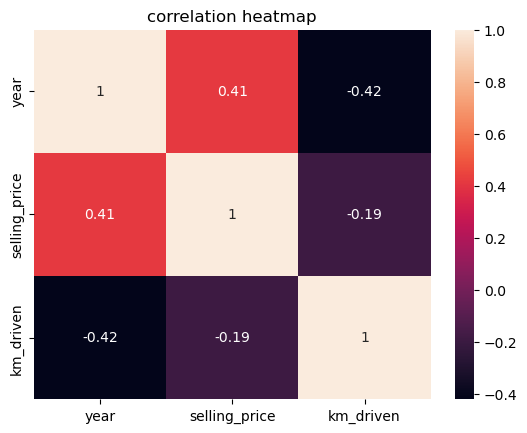

In [72]:
sns.heatmap(corr,annot=True)
plt.title('correlation heatmap')

3. Data Preprocessing

● Encode categorical variables using Label or OneHot Encoding.

● Normalize or scale numerical features.

● Split data into training and testing sets (e.g., 80:20)

In [77]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['owner'] = label.fit_transform(df['owner'])
df['fuel'] = label.fit_transform(df['fuel'])
df['transmission'] = label.fit_transform(df['transmission'])
df['seller_type'] = label.fit_transform(df['seller_type'])

In [78]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [80]:
df['owner'].unique()

array([0, 2, 1, 4, 3], dtype=int64)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col=['year', 'km_driven']
df[col]=scaler.fit_transform(df[col])

In [88]:
new_df=df.drop('name',axis=1)
new_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,-1.445074,60000,0.081139,4,1,1,0
1,-1.445074,135000,-0.347689,4,1,1,0
2,-0.258795,600000,0.724381,1,1,1,0
3,0.927485,250000,-0.433455,4,1,1,0
4,0.215717,450000,1.603479,1,1,1,2


In [91]:
from sklearn.model_selection import train_test_split

In [98]:
X=new_df.iloc[:,2:]
y=new_df.iloc[:,1]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

4. Model Development

● Train a Linear Regression model on the training data.

● Predict car prices on the test data

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [103]:
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
y_pred = lr.predict(X_test)

In [111]:
y_pred[0]

590689.1356533766

5. Model Evaluation

Assess the model using:

● Mean Absolute Error (MAE)

● Mean Squared Error (MSE)

● Root Mean Squared Error (RMSE)

● R² Score (Goodness of Fit)

In [113]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [114]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))

Mean absolute error : 243501.76071555648


In [115]:
print('mse' , mean_squared_error(y_test,y_pred))

mse 199248312711.52216


In [118]:
print('rmse' , np.sqrt(mean_squared_error(y_test,y_pred)))

rmse 446372.39241637936


In [119]:
print('R2 score', r2_score(y_test,y_pred))

R2 score 0.34709137226972386
